# TensorFlow

TensorFlow is an open source library for numerical computation using data flow graphs. Nodes in the graph represent mathematical operations, while the graph edges represent the multidimensional data arrays (tensors) communicated between them. The flexible architecture allows you to deploy computation on almost any platforms.


## Programming Models for Deep Learning
### Symbolic v.s. Imperative style programs
If you are a python or C++ programmer, then you are already familiar with imperative programs. Imperative style programs conduct the computation as we run them. Most of the code you write in python is imperative, for example:

    import numpy as np
    a = np.ones(10)
    b = np.ones(10) * 2
    c = b * a

Symbolic programs are different. The following lines are an equivalent symbolic style program that achieves the same goal:

    A = Variable()
    B = Constant()
    C = B * A
    # compiles the function
    f = compile(C)
    # run the function
    c = f.run(A=np.ones(10), B=np.ones(10)*2)

when C = B * A is executed, there is no actual computation happening. Instead, these operations generate a computation graph (symbolic graph) that represents the computation. Symbolic programs separates computation graph (1)definition, (2)compiling, and (3)running step.

Generally speaking, imperative programs are more flexible, while symblic programs are more efficient (graph optimizations, better garbage collections).


In [1]:
import numpy as np
import tensorflow as tf

Get familiar with the following basic tensorflow methods:

    # define constant
    tf.Constant()

    # define trainable parameters
    tf.Variable()

    # holding mini-batch input data to the graph
    tf.placeholder()

    # common neural network layers
    tf.nn.*()

    # Launch the existing graph
    tf.Session()

### Now let's first implement 'C=B*A' in TensorFlow!

In [2]:
# Define C=B*A in a symbolic way
A = tf.Variable(tf.ones([10]))
B = tf.constant(np.ones(10)*2, tf.float32)
C = tf.multiply(A, B)
init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    # initialize variables
    sess.run(init)
    # run the graph and evaluate C
    c = sess.run([C])
    print ('c: %r' % c)

c: [array([ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.], dtype=float32)]


## Linear Regression example

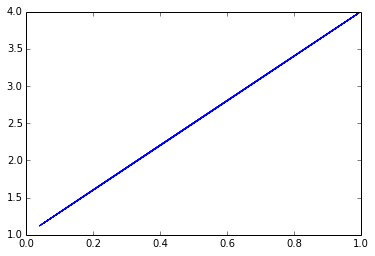

In [3]:
# Generate ground truth 100 x, y data points in NumPy, y = 3.0 * x + 1.0
# Regress for W and b that compute y_data = W * x_data + b
x_data = np.random.rand(100).astype(np.float32)
y_data = 3.0 * x_data + 1.0

%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_data, y_data)

In [4]:
# define trainable variables
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))

In [5]:
# define graph operations
y = tf.multiply(W, x_data) + b

In [6]:
# define loss, L2
loss = tf.reduce_mean(tf.square(y - y_data))

In [7]:
# define optimizer for training
train_optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(loss)

In [8]:
# define the operation that initializes variables
init2 = tf.global_variables_initializer()

In [9]:
# Launch the graph
with tf.Session() as sess:
    # initialization
    sess.run(init2)

    # starting training
    training_iters = 100
    for step in range(training_iters):
        if step % 20 == 0 or (step+1)==training_iters:
            print(step, sess.run(W), sess.run(b))
            
        # run optimizer during training
        _ = sess.run([train_optimizer])
        

(0, array([ 0.51966214], dtype=float32), array([ 0.], dtype=float32))
(20, array([ 2.67674804], dtype=float32), array([ 1.1685015], dtype=float32))
(40, array([ 2.93216944], dtype=float32), array([ 1.03535807], dtype=float32))
(60, array([ 2.98576641], dtype=float32), array([ 1.00741947], dtype=float32))
(80, array([ 2.99701357], dtype=float32), array([ 1.00155675], dtype=float32))
(99, array([ 2.99932241], dtype=float32), array([ 1.00035322], dtype=float32))
